## Indice:
* [Esercizio 1.1](#es1)
* [Esercizio 1.2](#es2)
    * [Test del teorema del limite centrale](#test)
* [Esercizio 1.3](#es3)

## Esercizio 1.1 <a class="anchor" id="es1"></a>

commenti

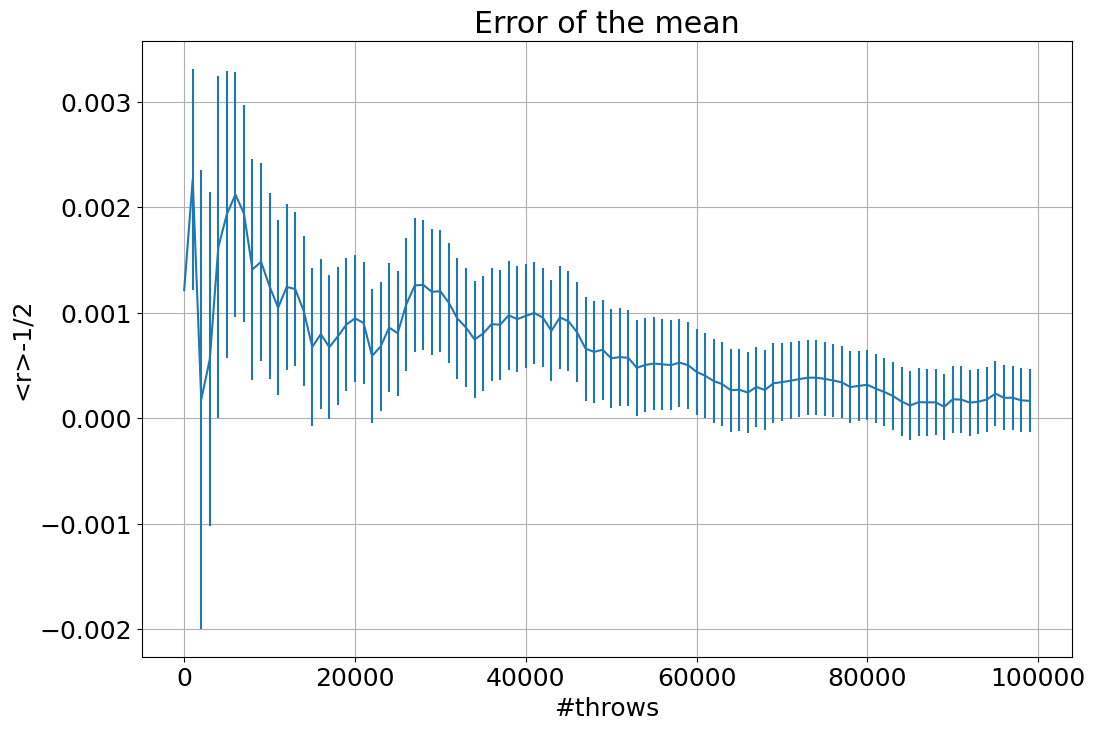

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats


plt.rcParams.update({'font.size': 18})

df = pd.read_csv("./1.1/test.txt")

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)
x*=L

plt.figure(figsize=(12,8))
plt.title("Error of the mean")
plt.errorbar(x,df["mean"]-0.5,yerr=df["error_mean"])
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)

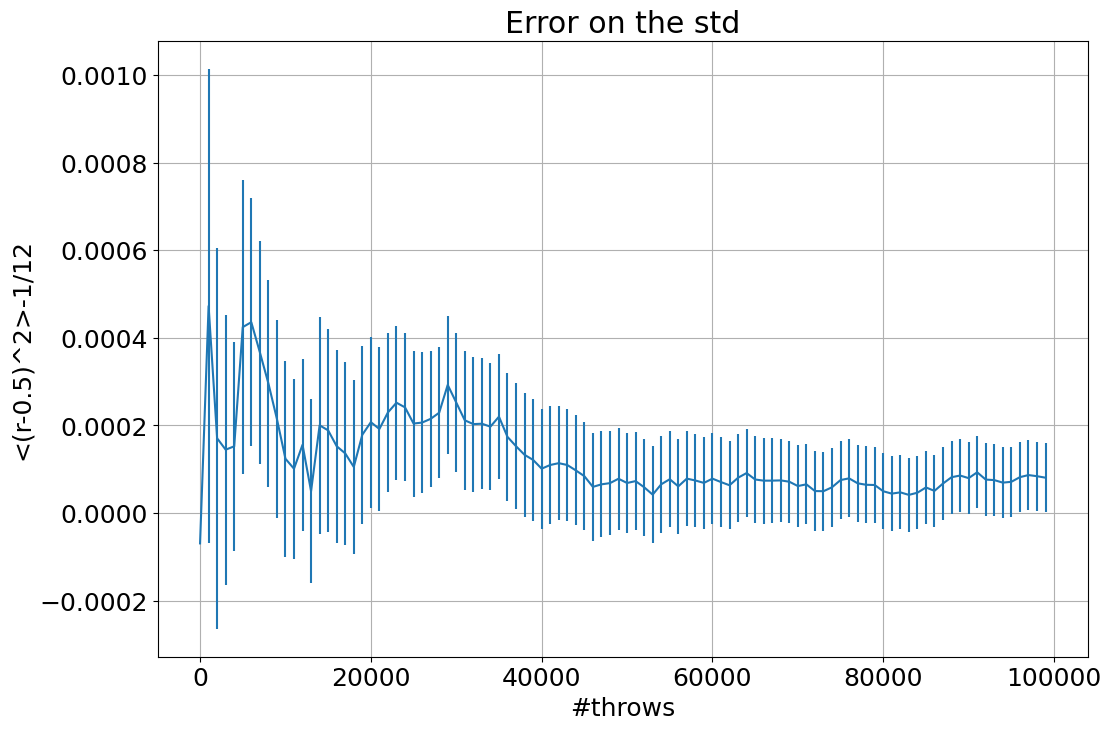

In [2]:
 
plt.figure(figsize=(12,8))
plt.title("Error on the std")
plt.errorbar(x,df["std"]-1/12.,yerr=df["error_std"])
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

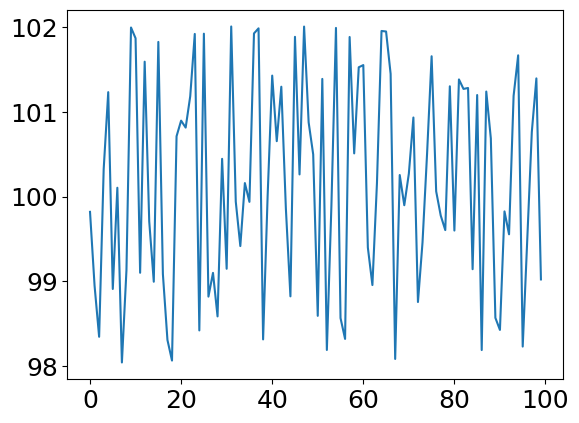

In [3]:
df = pd.read_csv("./1.1/chi.txt")

M = 100
N = 10000

x = np.arange(M)

plt.plot(x,df["chi^2"])

In [4]:
df["chi^2"].mean()

100.175869

In [5]:
df["chi^2"].std()

1.246422513338301

<AxesSubplot: title={'center': 'Istogramma valori di $\\chi^2$'}, xlabel='$\\chi^2$', ylabel='Count'>

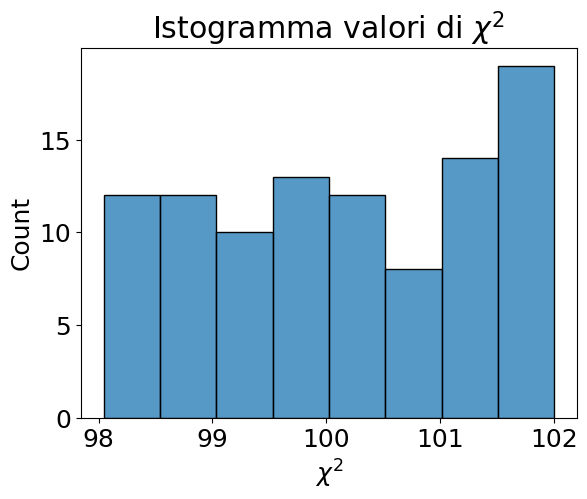

In [6]:
plt.title("Istogramma valori di $\chi^2$")
plt.xlabel("$\chi^2$")
sns.histplot(df["chi^2"])

## Esercizio 1.2 <a class="anchor" id="es3"></a>

commenti

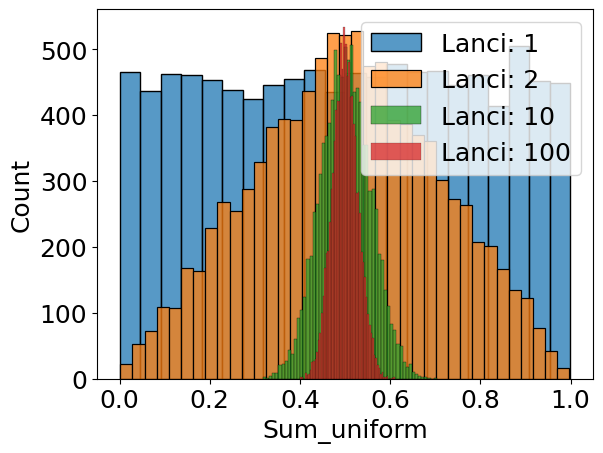

In [7]:
# Dataframes per i vari lanci

df1 = pd.read_csv("./1.2/real1.txt")
df2 = pd.read_csv("./1.2/real2.txt")
df10 = pd.read_csv("./1.2/real10.txt")
df100 = pd.read_csv("./1.2/real100.txt")

# Plots per la distribuzione uniforme per i vari lanci
sns.histplot(df1["Sum_uniform"],label="Lanci: 1")
sns.histplot(df2["Sum_uniform"],label="Lanci: 2")
sns.histplot(df10["Sum_uniform"],label="Lanci: 10")
sns.histplot(df100["Sum_uniform"],label="Lanci: 100")
plt.legend()

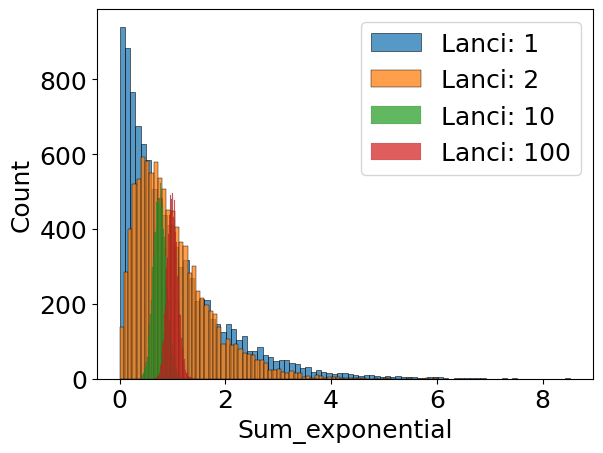

In [8]:
# Plots per la distribuzione esponenziale per i vari lanci

sns.histplot(df1["Sum_exponential"],label="Lanci: 1")
sns.histplot(df2["Sum_exponential"],label="Lanci: 2")
sns.histplot(df10["Sum_exponential"],label="Lanci: 10")
sns.histplot(df100["Sum_exponential"],label="Lanci: 100")
plt.legend()

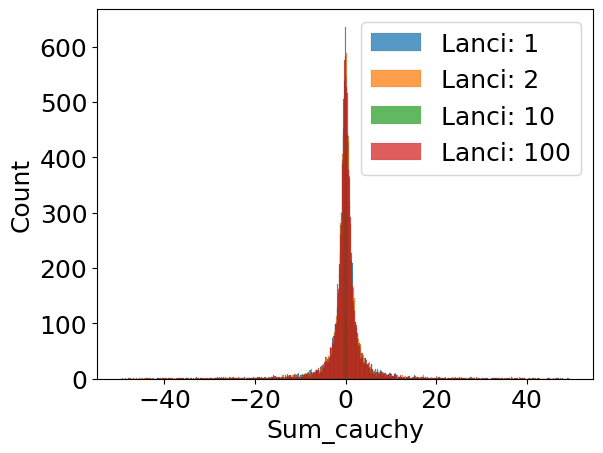

In [9]:
# Plots per la distribuzione cauchy per i vari lanci
limit = 50.0
df1 = df1[(df1["Sum_cauchy"]< limit) & (df1["Sum_cauchy"]> -limit)]
df2 = df2[(df2["Sum_cauchy"]< limit) & (df2["Sum_cauchy"]> -limit)]
df10 = df10[(df10["Sum_cauchy"]< limit) & (df10["Sum_cauchy"]> -limit)]
df100 = df100[(df100["Sum_cauchy"]< limit) & (df100["Sum_cauchy"]> -limit)]

sns.histplot(df1["Sum_cauchy"],label="Lanci: 1")
sns.histplot(df2["Sum_cauchy"],label="Lanci: 2")
sns.histplot(df10["Sum_cauchy"],label="Lanci: 10")
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100")
plt.legend()

### TEST DEL TEOREMA DEL LIMITE CENTRALE <a class="anchor" id="test"></a>

===p-value===
0.4130339617289702


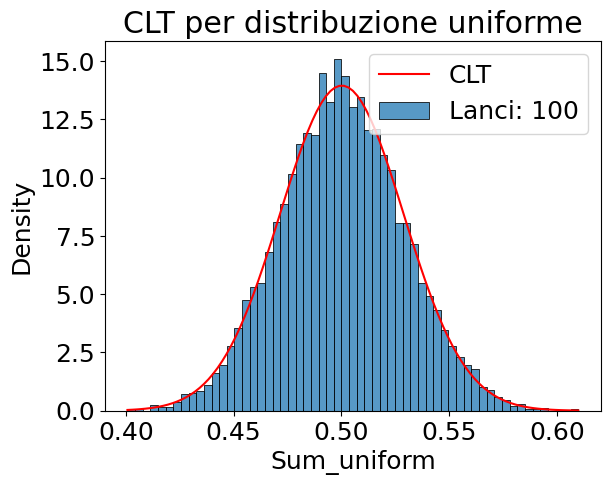

In [10]:
# Fit dei dati nel caso N = 100

mu = df100["Sum_uniform"].mean()
sigma = df100["Sum_uniform"].std()

xmin=np.min(df100["Sum_uniform"])
xmax=np.max(df100["Sum_uniform"])
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 

plt.title("CLT per distribuzione uniforme")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_uniform"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_uniform"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("===p-value===")
print(p)

Supponendo un valore di comparazione per la p-value come $\alpha = 0.05$, si che p$ > \alpha$, e quindi non si può scartare l'ipotesi nulla

===p-value===
0.018532270879817927


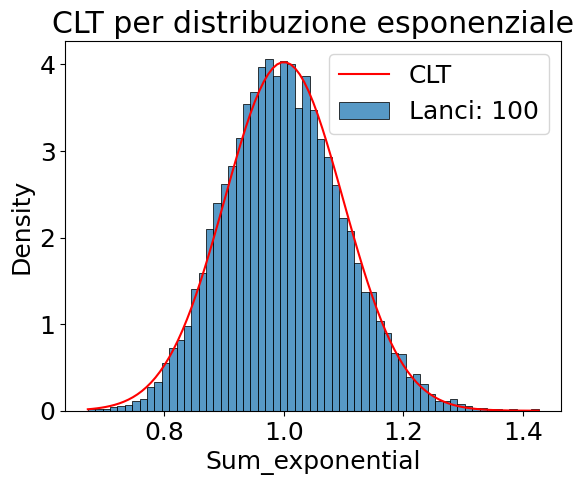

In [11]:
mu = df100["Sum_exponential"].mean()
sigma = df100["Sum_exponential"].std()

xmin=np.min(df100["Sum_exponential"])
xmax=np.max(df100["Sum_exponential"])
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 

plt.title("CLT per distribuzione esponenziale")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_exponential"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_exponential"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("===p-value===")
print(p)

Nel caso della distribuzione esponenziale p$ > \alpha$ nel nostro caso e bisogna rigettare l'ipotesi nulla, d'altro canto un valore utilizzato per $\alpha$ è $0.01$ in questo caso non si potrebbe rigettare l'ipotesi nulla. Quindi magari aumentando il numero di campioni (i.e. 100 -> 1000) il fit potrebbe essere più buono.

==p-value==
0.0


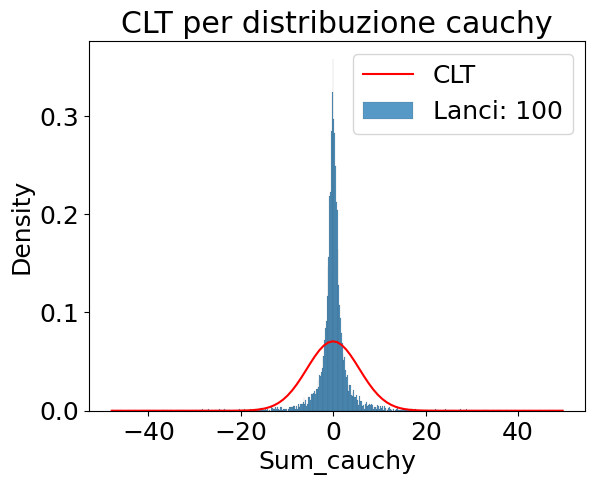

In [12]:
xmin=np.min(df100["Sum_cauchy"])
xmax=np.max(df100["Sum_cauchy"])
x = np.linspace(xmin,xmax,101)
mu = df100["Sum_cauchy"].mean()
sigma = df100["Sum_cauchy"].std()
g=stats.norm(mu,sigma) 

plt.title("CLT per distribuzione cauchy")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100",stat="density")
plt.legend()
#test per vedere la bontà del fit
set1 = df100["Sum_cauchy"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("==p-value==")
print(p)

Essendo la p value nulla si può scaratre l'ipotesi che valga il CLT con gaussiana per la distribuzione di Cauchy

==p-value==
0.23544228688682256


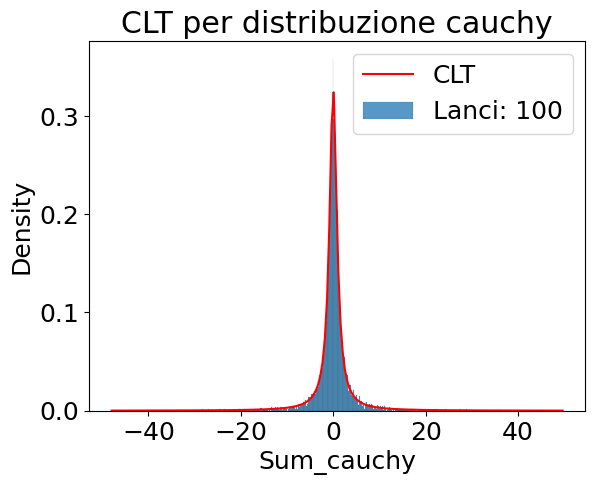

In [13]:
xmin=np.min(df100["Sum_cauchy"])
xmax=np.max(df100["Sum_cauchy"])
x = np.linspace(xmin,xmax,202)
mu,gamma = stats.cauchy.fit(df100["Sum_cauchy"])
g=stats.cauchy(mu,gamma) 

plt.title("CLT per distribuzione cauchy")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_cauchy"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.cauchy.cdf
                   (x, loc=mu, scale=gamma))
print("==p-value==")
print(p)

La p-value è abbastanza alta da poter non scartare l'ipotesi nulla che sia distribuita secondo una distribuzione di Cauchy, in quanto come prima p$ > \alpha$

## Esercizio 1.3<a class="anchor" id="es3"></a>

COmmentoi

In [122]:
# Dataframes per i vari lanci

df = pd.read_csv("./1.3/Buffon.txt")
df_er = pd.read_csv("./1.3/err.txt")

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(len(df["PI"]))
#x*=L


Text(0, 0.5, '$\\pi$')

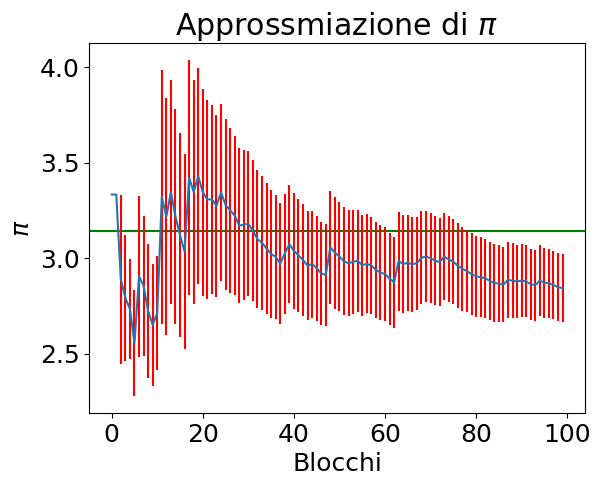

In [123]:
plt.axhline(y=np.pi, color = 'g', linestyle = '-', label = "$\pi$")
plt.errorbar(x,df["PI"],yerr=df_er["err_pi"],ecolor='r')
plt.title("Approssmiazione di $\pi$")
plt.xlabel("Blocchi")
plt.ylabel("$\pi$")

In [124]:
np.pi

3.141592653589793